In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

import george
import emcee
import scipy.stats
import corner
import h5py

In [2]:
# 

In [3]:
h5py_files = list()
obs_files = list()

import glob, os

for file in glob.glob("../data/paper_plots/ztf_lightcurves/*.hdf5"):
    h5py_files.append(file)
    
for file in glob.glob("../data/paper_plots/ztf_lightcurves/*.txt"):
    obs_files.append(file)

#obs_files

In [4]:
obs_files[7]

'../data/paper_plots/ztf_lightcurves/11395.txt'

In [5]:
data  = pd.read_csv("../data/old_simulation_results_2/3200/3200_lc_49627_to_49787.txt", delimiter=" ", header=None)

time= data[0]
flux = data[1]

In [7]:
time, flux, flux_err = run_gp.read_data(obs_files[11], whitespace=True)

<IPython.core.display.Javascript object>


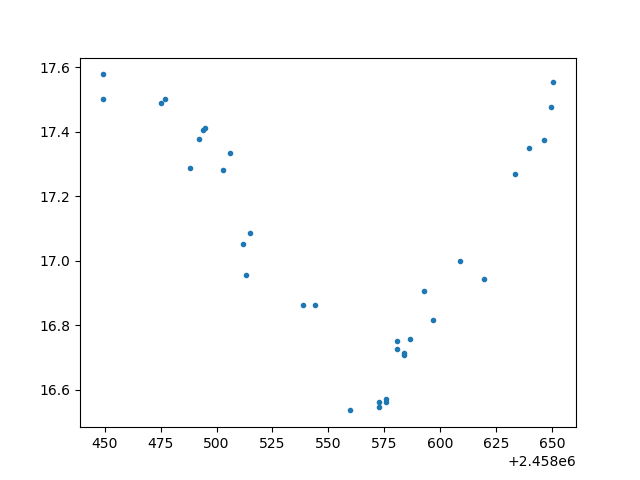

In [10]:
plt.plot(time, flux, '.')

In [54]:
#guess the preliminary kernel numbers 
"""Calculates initial gp parameter values based on data."""
k1 = np.mean(flux) * george.kernels.ExpSquaredKernel(metric=10**2)
k2 = 0.5 * george.kernels.ExpSine2Kernel(gamma=7, log_period=np.log(3/24.))

kernel = k1+k2

gp = george.GP(kernel, mean=np.mean(flux), fit_mean=True)

gp.compute(time, flux_err)
pred, pred_var = gp.predict(flux, np.arange(time[0], time[len(time)-1], 1/24.), return_var=True)
ln_likelihood = gp.log_likelihood(flux)

<IPython.core.display.Javascript object>


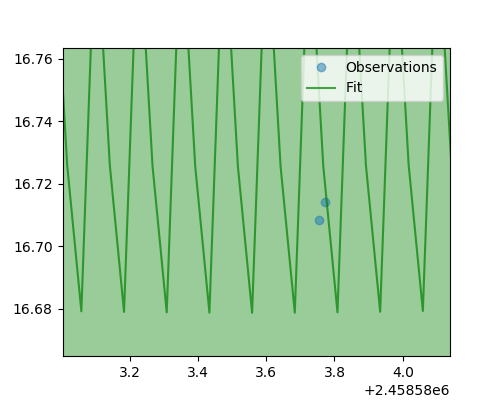

In [55]:
plt.figure(figsize=(5, 4))
plt.plot(time, flux, 'o', alpha=0.5, label="Observations")

#plot the kernel-fitted guess
plt.fill_between(np.arange(time[0], time[len(time)-1], 1/24.), pred - np.sqrt(pred_var), pred + np.sqrt(pred_var), color="green", alpha=0.4)
plt.plot(np.arange(time[0], time[len(time)-1], 1/24.), pred, 'g', lw=1.5, alpha=0.7, label="Fit")

plt.legend()

In [56]:
from scipy.optimize import minimize

def neg_ln_like(p):
    gp.set_parameter_vector(p)
    try:
        negloglike =  -gp.log_likelihood(flux)
        return negloglike
    except scipy.linalg.LinAlgError:
        return np.inf
#print(neg_ln_like)

def grad_neg_ln_like(p):
    gp.set_parameter_vector(p)
    try:
        grad_loglike =  -gp.grad_log_likelihood(flux)
        return grad_loglike
    except scipy.linalg.LinAlgError:
        return np.inf
    #return -gp.grad_log_likelihood(y)

In [59]:
gp.get_parameter_names()

('mean:value',
 'kernel:k1:k1:log_constant',
 'kernel:k1:k2:metric:log_M_0_0',
 'kernel:k2:k1:log_constant',
 'kernel:k2:k2:gamma',
 'kernel:k2:k2:log_period')

In [58]:
result = minimize(neg_ln_like, gp.get_parameter_vector(), jac=grad_neg_ln_like) #, method='L-BFGS-B')
gp.set_parameter_vector(result.x)


ln_likelihood_opt = gp.log_likelihood(flux)
#if (print_results == True):
print(ln_likelihood, result, ln_likelihood_opt)

#return gp, ln_likelihood_opt, result.fun

-33.15523681543639       fun: -26.738980013302378
 hess_inv: array([[1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1]])
      jac: array([ 4.01439593e-08,  3.05273875e-08,  2.07486579e-09, -9.01827961e-09,
       -2.06286128e-10,  4.07703391e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 73
      nit: 0
     njev: 61
   status: 2
  success: False
        x: array([17.16377573, -2.49891069,  6.03600247, -6.32104704, 41.94278233,
       -2.07933558]) 26.738980013302378


<IPython.core.display.Javascript object>


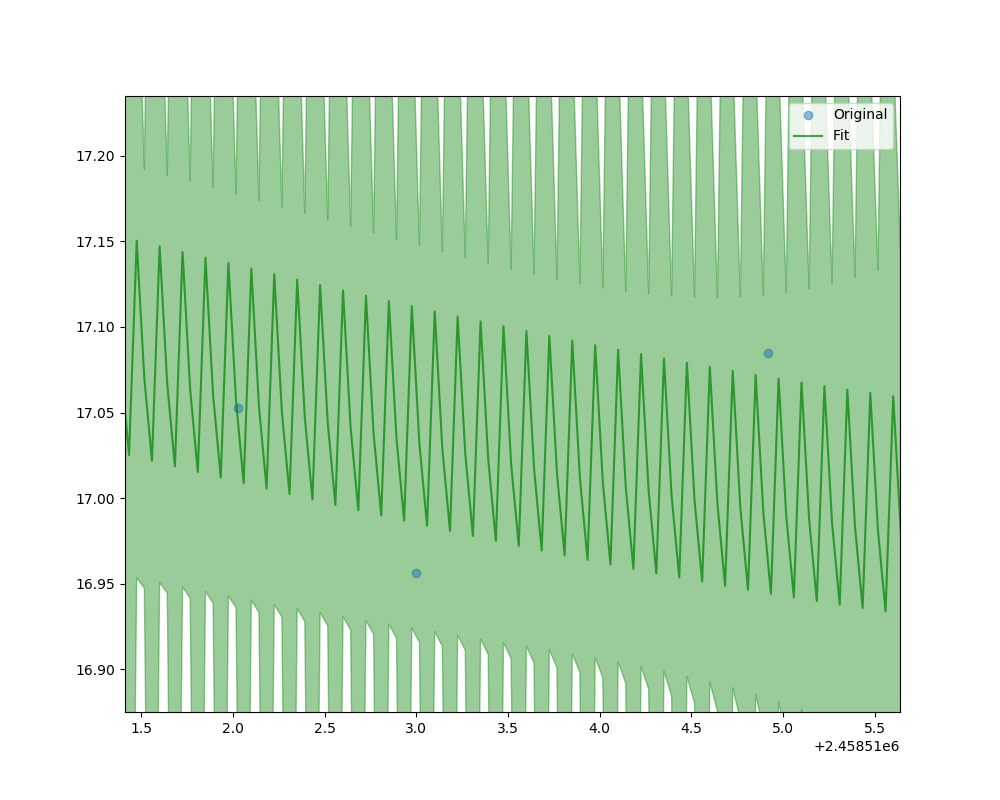

In [60]:
plt.figure(figsize=(10, 8))
plt.plot(time, flux, 'o', alpha=0.5, label="Original")
#plt.plot(x,y, 'ko', ms = 3, alpha=0.5, label="Sample")

#plot the kernel-fitted guess
plt.fill_between(np.arange(time[0], time[len(time)-1], 1/24.), pred - np.sqrt(pred_var), pred + np.sqrt(pred_var), color="green", alpha=0.4)
plt.plot(np.arange(time[0], time[len(time)-1], 1/24.), pred, 'g', lw=1.5, alpha=0.7, label="Fit")

#all the x-values visually present we want to map onto
#x_short = np.linspace(time[0], time[len(time)-1], 1000)

#optimize the fit
#gp2, ln_like2, result = cgp.optimize(y,gp,gp.lnlikelihood, print_results=True)
#pred, pred_var = gp.predict(flux, x_short, return_var=True)

#print the optimized fit
#plt.fill_between(x_short, pred - np.sqrt(pred_var), pred + np.sqrt(pred_var), color="red", alpha=0.4)
#plt.plot(x_short, pred, "red", lw=1.5, alpha=0.5, label="Optimized")
#plt.xlim([pre_x[0], pre_x[cap]])
plt.legend()

In [61]:
kernel.get_parameter_names()

('k1:k1:log_constant',
 'k1:k2:metric:log_M_0_0',
 'k2:k1:log_constant',
 'k2:k2:gamma',
 'k2:k2:log_period')

## Let's try some MCMC


'mean:value',
 
'kernel:k1:k1:log_constant',

'kernel:k1:k2:metric:log_M_0_0',

'kernel:k2:k1:log_constant',

'kernel:k2:k2:gamma',

'kernel:k2:k2:log_period')

In [75]:
nwalkers=100

In [76]:
# Calculates initial gp parameter values based on data

mean_flux = np.mean(flux)

# k1
log_amp_k1 = np.log(flux.max()-flux.min())
metric = 5**2

# k2
log_amp_k2 = np.log(0.5)
gamma = 10
log_period = np.log(6/24.)

parameters = {"mean": mean_flux, "log_amp_k1": log_amp_k1, "metric": metric, "log_amp_k2": log_amp_k2, "gamma": gamma,"log_period": log_period}
params = parameters

In [77]:
# Creates a matrix of starting parameters for every walker.
p_start = np.array(list(params.values()))
cov_matrix = np.sqrt(np.diag(p_start)**2)
p0 = np.random.multivariate_normal(mean=p_start, cov=cov_matrix, size=(nwalkers))

# equally distributed starting period values for
p0[:,-1] = np.random.normal(size=nwalkers)*0.5 + np.log(4/24.)

walker_params = p0

In [78]:
walker_params

array([[ 1.87845571e+01,  3.43613085e-02,  2.69355527e+01,
        -1.71960566e+00,  8.51356199e+00, -2.41761739e+00],
       [ 1.66161167e+01,  5.21783566e-01,  1.82772989e+01,
         4.20847215e-01,  1.53512061e+01, -1.75101827e+00],
       [ 1.45556777e+01, -2.21358546e-01,  2.48410486e+01,
        -7.52590890e-01,  1.48774905e+01, -3.13308196e+00],
       [ 2.22103311e+01,  5.93122428e-02,  2.69732276e+01,
        -7.25919896e-01,  5.72763844e+00, -2.34584394e+00],
       [ 1.86081889e+01,  2.64332755e-01,  2.45841897e+01,
        -5.09292383e-01,  8.47888419e+00, -4.85442591e-01],
       [ 1.45747954e+01, -7.18672388e-02,  2.20229855e+01,
        -1.64005636e+00,  9.69627814e+00, -1.31793896e+00],
       [ 1.94996261e+01, -1.33777204e-02,  2.72294632e+01,
         7.22819418e-01,  1.14722964e+01, -9.31344349e-01],
       [ 1.55968471e+01,  1.53987725e-02,  2.46115353e+01,
        -1.52352184e+00,  7.95220600e+00, -1.17303608e+00],
       [ 2.45246955e+01,  2.46933832e-02,  2.065

In [79]:
def prior(params):

    """
    Calculated the log of the prior values, given parameter values.

    Parameters
    ----------
    params : list
        List of all kernel parameters

    'mean:value',

    'kernel:k1:k1:log_constant',

    'kernel:k1:k2:metric:log_M_0_0',

    'kernel:k2:k1:log_constant',

    'kernel:k2:k2:gamma',

    'kernel:k2:k2:log_period')

    Returns
    -------
    sum_log_prior : int
        sum of all log priors (-inf if a parameter is out of range)

    """

    p_mean = scipy.stats.norm(np.mean(flux), 0.5).logpdf(params[0])
    p_log_amp_k1 = scipy.stats.norm(np.log(2), np.log(10)).logpdf(params[1])
    p_log_metric = scipy.stats.norm(np.log(100), np.log(10)).logpdf(np.log(params[2]))
    
    p_log_amp_k2 = scipy.stats.norm(np.log(2), np.log(2)).logpdf(params[3])
    p_log_gamma = scipy.stats.norm(np.log(10), np.log(2)).logpdf(np.log(params[4]))
    p_log_period = scipy.stats.norm(np.log(4./24.), (12./24.)).logpdf(params[5])


    sum_log_prior =  p_mean + p_log_amp_k1 + p_log_metric + p_log_amp_k2 + p_log_gamma + p_log_period

    if np.isnan(sum_log_prior) == True:
        return -np.inf

    return sum_log_prior


def logl(params, gp, tsample, fsample, flux_err):
     # compute lnlikelihood based on given parameters
    gp.set_parameter_vector(params)


    try:
        gp.compute(tsample, flux_err)
        lnlike = gp.lnlikelihood(fsample)
    except np.linalg.LinAlgError:
        lnlike = -1e25

    return lnlike


def post_lnlikelihood(params, gp, tsample, fsample, flux_err):

    """
    Calculates the posterior likelihood from the log prior and
    log likelihood.

    Parameters
    ----------
    params : list
        List of all kernel parameters

    Returns
    -------
    ln_likelihood : float
        The posterior, unless the posterior is infinite, in which case,
        -1e25 will be returned instead.

    """

    # calculate the log_prior
    log_prior = prior(params)

    # return -inf if parameters are outside the priors
    if np.isneginf(log_prior) == True:
        return -np.inf

    try:
        lnlike = logl(params, gp, tsample, fsample, flux_err)
        ln_likelihood = lnlike+log_prior

    except np.linalg.linalg.LinAlgError:
        ln_likelihood = -1e25

    return ln_likelihood if np.isfinite(ln_likelihood) else -1e25


In [80]:
ndim = 6
threads = 1
iterations = 1000
#burn_in=100

sampler = emcee.EnsembleSampler(nwalkers, ndim, post_lnlikelihood, args=[gp, time, flux, flux_err])

#run steps for a burn-in
#state = sampler.run_mcmc(walker_params, burn_in)
#sampler.reset()
#print(state[0])
data = sampler.run_mcmc(walker_params, iterations)

/home/christina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in log
/home/christina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in log


emcee: Exception while calling your likelihood function:
  params: [17.52782388 -0.16978832 -1.20947262 -3.39039381  9.34641146 -0.88635923]
  args: [<george.gp.GP object at 0x7ffa184f86d0>, 0     2.458449e+06
1     2.458449e+06
2     2.458475e+06
3     2.458477e+06
4     2.458488e+06
5     2.458492e+06
6     2.458494e+06
7     2.458495e+06
8     2.458503e+06
9     2.458506e+06
10    2.458512e+06
11    2.458513e+06
12    2.458515e+06
13    2.458539e+06
14    2.458544e+06
15    2.458560e+06
16    2.458573e+06
17    2.458573e+06
18    2.458576e+06
19    2.458576e+06
20    2.458581e+06
21    2.458581e+06
22    2.458584e+06
23    2.458584e+06
24    2.458587e+06
25    2.458593e+06
26    2.458597e+06
27    2.458609e+06
28    2.458620e+06
29    2.458634e+06
30    2.458640e+06
31    2.458647e+06
32    2.458650e+06
33    2.458651e+06
Name: 0, dtype: float64, 0     17.5021
1     17.5772
2     17.4895
3     17.5009
4     17.2879
5     17.3764
6     17.4061
7     17.4102
8     17.2797
9     17.333

Traceback (most recent call last):
  File "/home/christina/anaconda3/lib/python3.7/site-packages/emcee/ensemble.py", line 519, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "<ipython-input-79-f492da2e6fcd>", line 81, in post_lnlikelihood
    log_prior = prior(params)
  File "<ipython-input-79-f492da2e6fcd>", line 30, in prior
    p_mean = scipy.stats.norm(np.mean(flux), 0.5).logpdf(params[0])
  File "/home/christina/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py", line 453, in logpdf
    return self.dist.logpdf(x, *self.args, **self.kwds)
  File "/home/christina/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py", line 1702, in logpdf
    goodargs = argsreduce(cond, *((x,)+args+(scale,)))
  File "/home/christina/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py", line 549, in argsreduce
    return [np.extract(cond, arr1 * expand_arr) for arr1 in newargs]
  File "/home/christina/anaconda3/l

KeyboardInterrupt: 

In [121]:
sampler.flatchain

array([[ 2.15104467e+01, -5.42779508e-01,  1.00063276e+04,
        -2.70113284e+00,  2.03113891e+00, -1.21562450e+00],
       [ 2.15104467e+01, -5.42779508e-01,  1.00063276e+04,
        -2.70113284e+00,  2.03113891e+00, -1.21562450e+00],
       [ 2.15104467e+01, -5.42779508e-01,  1.00063276e+04,
        -2.70113284e+00,  2.03113891e+00, -1.21562450e+00],
       ...,
       [ 1.59699495e+01,  1.18175022e-01,  9.74580026e+03,
        -1.04382501e+00,  7.26492859e+00, -6.97898869e-01],
       [ 1.59699495e+01,  1.18175022e-01,  9.74580026e+03,
        -1.04382501e+00,  7.26492859e+00, -6.97898869e-01],
       [ 1.59699495e+01,  1.18175022e-01,  9.74580026e+03,
        -1.04382501e+00,  7.26492859e+00, -6.97898869e-01]])

<IPython.core.display.Javascript object>


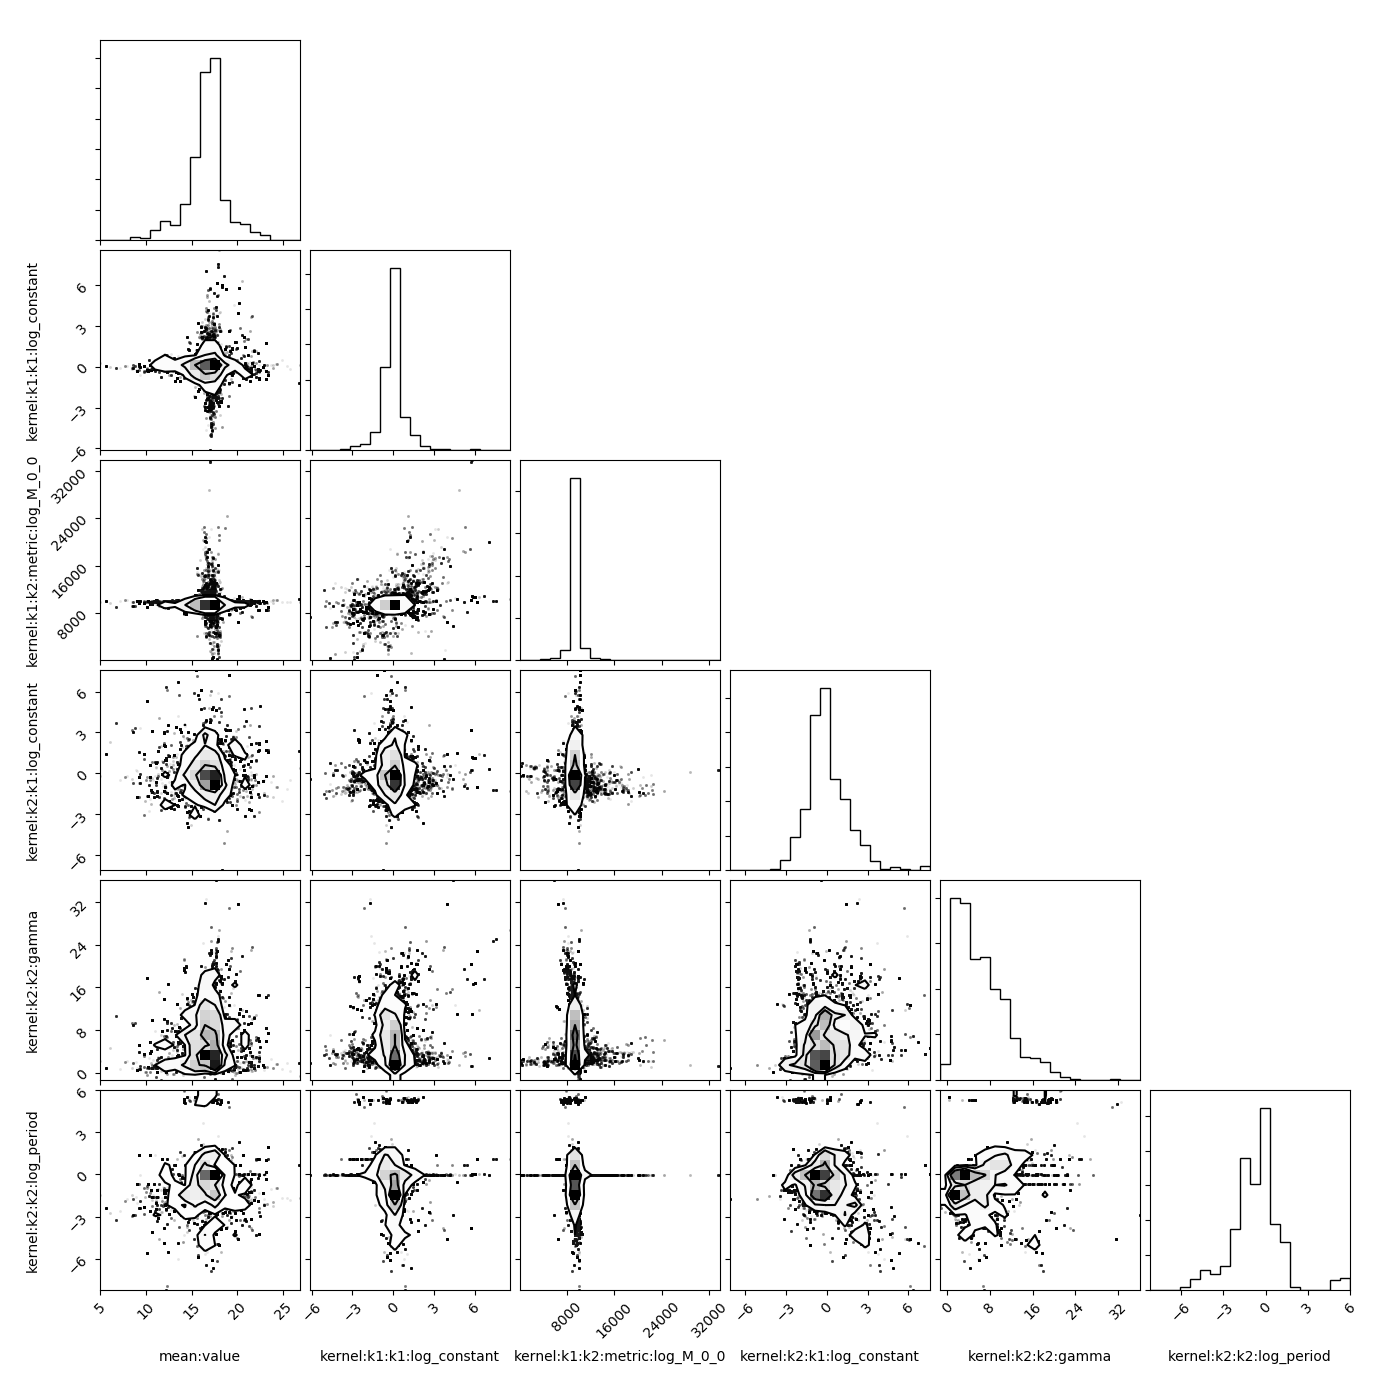

In [100]:
labels = list(gp.get_parameter_names())

figure = corner.corner(sampler.flatchain, labels=labels, title_kwargs={"fontsize": 8})

In [101]:
burn_in = 0

In [106]:
"""
    Write the sampler results as an HDF5 file,
    with all the other info you might want.
    """

with h5py.File("testing"+".hdf5", "w") as f:
    f.create_dataset("chain", data=sampler.chain)

    f.attrs['true_period'] = 0

    f.attrs['walkers'] = nwalkers
    f.attrs['iterations'] = iterations
    f.attrs['data_pts'] = len(flux)
    f.attrs['acceptance_fraction'] = sampler.acceptance_fraction
    f.attrs['burn_in'] = burn_in
    f.create_dataset("time", data= time)
    f.create_dataset("flux", data = flux)
    f.create_dataset("flux_err", data = flux_err)

In [128]:
sampler.chain.shape()

TypeError: 'tuple' object is not callable

In [125]:
colours = None
if colours is None:
    colours = ["black"]

dims = list(gp.get_parameter_names())

fig, ax = plt.subplots(3, 2, figsize=(10,9))
fig.subplots_adjust(wspace=0.5, hspace=0.3)
axs = [ax[0,0], ax[0,1], ax[1,0], ax[1,1]]

x = np.arange(iterations)

for i in range(sampler.chain.shape[2]):
    axs[i].set_xlabel('Step Number')
    axs[i].set_ylabel('{}'.format(dims[i]))

    for j in range(sampler.chain.shape[0]):
        param = sampler.chain[j,:,i]
        axs[i].plot(x, param, color=colours[0], alpha=0.3)


<IPython.core.display.Javascript object>

IndexError: list index out of range

In [108]:
run_plotting.make_summary_plots("testing.hdf5", true_lightcurve=None, true_period=None)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

IndexError: list index out of range

In [110]:
data.shape()

AttributeError: 'tuple' object has no attribute 'shape'